In [12]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [13]:
nf = 1.674
ns = 1.52
nc = 1
espessuraTotal = 1e-6 #2*a
lmbd = 633e-9
c0 = 299792458
pi = np.pi
arredondamento = 6
u0 = 4*pi*1e-7
e0 = 1/(u0*c0**2)
k0 = 2*np.pi/lmbd 
a = espessuraTotal/2

# Calculo dos modos propagantes no guia

In [14]:
Vescolhido = k0*a*np.sqrt(nf**2 - ns**2)
sigma = (ns**2 - nc**2)/(nf**2 - ns**2)
omega = k0*c0
b  = np.linspace(1e-10, .99, 1000)
pc = (nf**2)/(nc**2)
ps = (nf**2)/(ns**2)
nm =int(1 + np.floor((2*Vescolhido - np.arctan(pc*np.sqrt(sigma)))/pi))
Vm = []
Ve = []

for m in range(nm):
  V = 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(pc*np.sqrt((b+sigma)/(1-b))) + np.arctan(ps*np.sqrt((b)/(1-b))))
  Vm.append(V)
  beta = np.sqrt(b*k0**2*(nf**2-ns**2)+k0**2*ns**2)
  neff = beta/k0

for m in range(nm):
  V = 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(np.sqrt((b+sigma)/(1-b))) + np.arctan(np.sqrt((b)/(1-b))))
  Ve.append(V)
  indiceefetivo = np.sqrt(b*k0**2*(nf**2-ns**2)+k0**2*ns**2)/k0

## TE

In [15]:
tol = 1e-20
r = 0.5
R = k0*a*np.sqrt(nf**2-ns**2) # V
u = np.zeros(nm)
u1 = np.zeros(nm)
v = np.zeros(nm)
w = np.zeros(nm)
bnormalizado = np.zeros(nm)
for m in range(nm):
    u[m] = 20
    u1[m] = R
    v[m] = 0
    w[m] = R*np.sqrt(sigma)
    while(np.absolute(u1[m]-u[m])>tol):
        u[m] = u1[m]
        F = m*pi/2 + np.arctan(v[m]/u[m])/2 + np.arctan(w[m]/u[m])/2
        u1[m] = r*F + (1-r)*u[m]
        v[m] = np.sqrt(R**2 - u1[m]**2)
        w[m] = np.sqrt((R**2)*sigma + v[m]**2)
    bnormalizado[m] = (v[m]/R)**2
    print("TE{0}: u={1} | v={2} | w={3} | beta normalizado={4}".format(m,round(u[m],arredondamento),round(v[m],arredondamento),round(w[m],arredondamento),round(bnormalizado[m],arredondamento)))


phi = np.zeros(nm)
beta = np.zeros(nm)
kf = np.zeros(nm)
alphas = np.zeros(nm) 
alphac = np.zeros(nm)
neff = np.zeros(nm)
print()
for m in range(nm):
    phi[m] = m*pi/2 + np.arctan(w[m]/u[m])/2 - np.arctan(v[m]/u[m])/2
    beta[m] = np.sqrt(bnormalizado[m]*(k0**2)*(nf**2 - ns**2) + (k0*ns)**2)
    kf[m] = np.sqrt(k0**2 * nf**2 - beta[m]**2)
    alphas[m] = np.sqrt(beta[m]**2 - k0**2 * ns**2)
    alphac[m] = np.sqrt(beta[m]**2 - k0**2 * nc**2)
    neff[m] = beta[m]/k0
    print("TE{0}:β={1} | neff={2} | Φ={3} | kf={4} | αs={5} | αc={6}".format(m,round(beta[m],arredondamento),round(neff[m],arredondamento),round(phi[m],arredondamento),round(kf[m],arredondamento),round(alphas[m],arredondamento),round(alphac[m],arredondamento)))


TE0: u=1.284755 | v=3.234979 | w=6.537761 | beta normalizado=0.863764
TE1: u=2.537734 | v=2.38235 | w=6.160586 | beta normalizado=0.46845

TE0:β=16416321.038635 | neff=1.653864 | Φ=0.092001 | kf=2569509.723341 | αs=6469958.118788 | αc=13075521.559012
TE1:β=15822060.806566 | neff=1.593995 | Φ=1.783906 | kf=5075467.317914 | αs=4764700.387433 | αc=12321171.850247


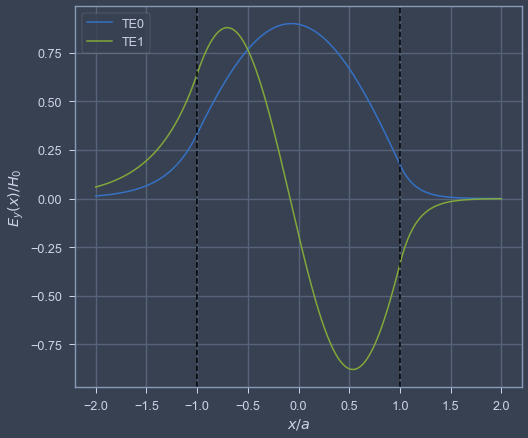

In [16]:
nte = omega*u/beta

H1 = 1
xs = np.linspace(-2*a,-a,num = 200)
xf = np.linspace(-a,a,num = 200)
xc = np.linspace(a,2*a,num = 200)
x = np.concatenate([xs,xf,xc])
cores = ['b','g','r','c','m','y','w']

Eyf = np.zeros(nm)
Eyc = np.zeros(nm)
Eys = np.zeros(nm)
Ey = np.zeros(600)

for m in range(nm):
    normalizacao = nte[m]*beta[m]*H1/kf[m]
    normalizacao = 1
    Eyf = nte[m]*beta[m]*H1*np.cos(kf[m]*xf + phi[m])/kf[m]/normalizacao #*j
    Eyc = nte[m]*beta[m]*H1*np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))/alphac[m]/normalizacao #*j
    Eys = nte[m]*beta[m]*H1*np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))/alphas[m]/normalizacao#*j
    Eytotal = np.concatenate([Eys,Eyf,Eyc])
    integral = np.trapz(np.multiply(Eytotal,Eytotal),x=x/a)
    Eytotal = Eytotal/np.sqrt(integral)
    Ey = np.vstack([Ey,Eytotal])
    plt.plot(np.concatenate([xs,xf,xc])/a,Eytotal,label = 'TE{0}'.format(m))
Ey = np.delete(Ey,0,0)
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_y(x)/H_0}$');


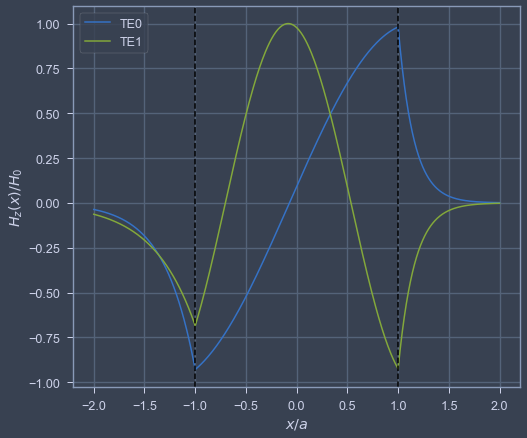

In [17]:
nte = omega*u/beta

H1 = 1
xs = np.linspace(-2*a,-a,num = 200)
xf = np.linspace(-a,a,num = 200)
xc = np.linspace(a,2*a,num = 200)
cores = ['b','g','r','c','m','y','w']


Eyf = np.zeros(nm)
Eyc = np.zeros(nm)
Eys = np.zeros(nm)

Hz = np.zeros(600)
for m in range(nm):
    #normalizacao = nte[m]*beta[m]*H1/kf[m]
    Hzf = np.sin(kf[m]*xf + phi[m])
    Hzc = np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))
    Hzs = -np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))
    Hztotal = np.concatenate([Hzs,Hzf,Hzc])
    integral = np.trapz(np.multiply(Hztotal,Hztotal),x=x/a)
    Hztotal = Hztotal/np.sqrt(integral)
    Hz = np.vstack([Hz,Hztotal])
    plt.plot(np.concatenate([xs,xf,xc])/a,Hztotal,label = 'TE{0}'.format(m))
Hz = np.delete(Hz,0,0)
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_z(x)/H_0}$');


## TM

In [18]:
tol = 1e-20
r = 0.5
R = k0*a*np.sqrt(nf**2-ns**2) # V
u = np.zeros(nm)
u1 = np.zeros(nm)
v = np.zeros(nm)
w = np.zeros(nm)
bnormalizado = np.zeros(nm)
for m in range(nm):
    u[m] = 20
    u1[m] = R
    v[m] = 0
    w[m] = R*np.sqrt(sigma)
    while(np.absolute(u1[m]-u[m])>tol):
        u[m] = u1[m]
        F = m*pi/2 + np.arctan(ps*(v[m]/u[m]))/2 + np.arctan(pc*(w[m]/u[m]))/2
        u1[m] = r*F + (1-r)*u[m]
        v[m] = np.sqrt(R**2 - u1[m]**2)
        w[m] = np.sqrt((R**2)*sigma + v[m]**2)
    bnormalizado[m] = (v[m]/R)**2
    print("TM{0}: u={1} | v={2} | w={3} | beta normalizado={4}".format(m,round(u[m],arredondamento),round(v[m],arredondamento),round(w[m],arredondamento),round(bnormalizado[m],arredondamento)))
phi = np.zeros(nm)
beta = np.zeros(nm)
kf = np.zeros(nm)
alphas = np.zeros(nm) 
alphac = np.zeros(nm)
neff = np.zeros(nm)
print()
for m in range(nm):
    phi[m] = m*pi/2 + np.arctan(pc*(w[m]/u[m]))/2 - np.arctan(ps*(v[m]/u[m]))/2
    beta[m] = np.sqrt(bnormalizado[m]*(k0**2)*(nf**2 - ns**2) + (k0*ns)**2)
    kf[m] = np.sqrt(k0**2 * nf**2 - beta[m]**2)
    alphas[m] = np.sqrt(beta[m]**2 - k0**2 * ns**2)
    alphac[m] = np.sqrt(beta[m]**2 - k0**2 * nc**2)
    neff[m] = beta[m]/k0
    print("TM{0}:β={1} | neff={2} | Φ={3} | kf={4} | αs={5} | αc={6}".format(m,round(beta[m],arredondamento),round(neff[m],arredondamento),round(phi[m],arredondamento),round(kf[m],arredondamento),round(alphas[m],arredondamento),round(alphac[m],arredondamento)))

TM0: u=1.364592 | v=3.20212 | w=6.521564 | beta normalizado=0.846306
TM1: u=2.674009 | v=2.228309 | w=6.10267 | beta normalizado=0.409829

TM0:β=16390531.770642 | neff=1.651265 | Φ=0.131674 | kf=2729183.932507 | αs=6404240.262495 | αc=13043128.433052
TM1:β=15732027.110037 | neff=1.584924 | Φ=1.883273 | kf=5348018.29381 | αs=4456617.395098 | αc=12205340.822264


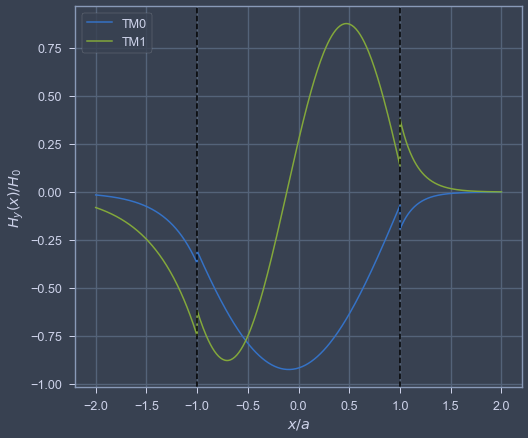

In [19]:
ntm = beta/(omega*e0)

E1 = 1
xs = np.linspace(-2*a,-a,num = 200)
xf = np.linspace(-a,a,num = 200)
xc = np.linspace(a,2*a,num = 200)
cores = ['b','g','r','c','m','y','w']

Hyf = np.zeros(nm)
Hyc = np.zeros(nm)
Hys = np.zeros(nm)
Hy = np.zeros(600)
for m in range(nm):
    normalizacao = (kf[m]*ntm[m])/(beta[m]*E1)
    Hyf = -beta[m]*E1*np.cos(kf[m]*xf + phi[m])/(kf[m]*ntm[m])*normalizacao #*j
    Hyc = -beta[m]*E1*np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))/(alphac[m]*ntm[m])*normalizacao #*j
    Hys = -beta[m]*E1*np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))/(alphas[m]*ntm[m])*normalizacao #*j
    Hytotal = np.concatenate([Hys,Hyf,Hyc])
    integral = np.trapz(np.multiply(Hytotal,Hytotal),x=x/a)
    Hytotal = Hytotal/np.sqrt(integral)
    Hy = np.vstack([Hy,Hytotal])
    plt.plot(np.concatenate([xs,xf,xc])/a,Hytotal,label = 'TM{0}'.format(m))
Hy = np.delete(Hy,0,0)
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_y(x)/H_0}$');


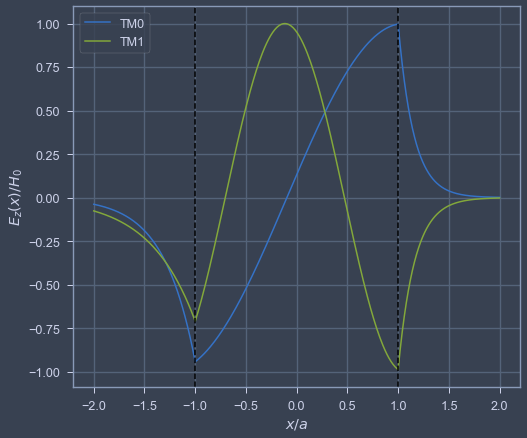

In [20]:
nte = omega*u/beta

H1 = 1
xs = np.linspace(-2*a,-a,num = 200)
xf = np.linspace(-a,a,num = 200)
xc = np.linspace(a,2*a,num = 200)
cores = ['b','g','r','c','m','y','w']

Ezf = np.zeros(nm)
Ezc = np.zeros(nm)
Ezs = np.zeros(nm)

for m in range(nm):
    #normalizacao = nte[m]*beta[m]*H1/kf[m]
    Ezf = np.sin(kf[m]*xf + phi[m])
    Ezc = np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))
    Ezs = -np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))
    plt.plot(np.concatenate([xs,xf,xc])/a,np.concatenate([Ezs,Ezf,Ezc]),label = 'TM{0}'.format(m))
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_z(x)/H_0}$');

# Sinal De entrada (Gaussiano)

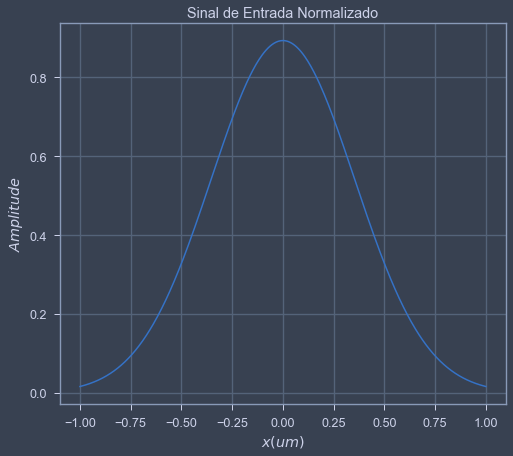

In [21]:
entrada = np.exp(-(x/a)**2)
integral = np.trapz(np.multiply(entrada,entrada),x=x/a)
entrada = entrada/np.sqrt(integral)
plt.plot(x*1e6,entrada);
plt.title('Sinal de Entrada Normalizado')
plt.xlabel(r'$\it{x (um)}$')
plt.ylabel(r'$\it{Amplitude}$');

# Normalização e calculo dos pesos de cada modo

## Modo TE

MODO TE
A0 = 0.99043
A1 = -0.06464
Transmissão modo TE = 98.51%


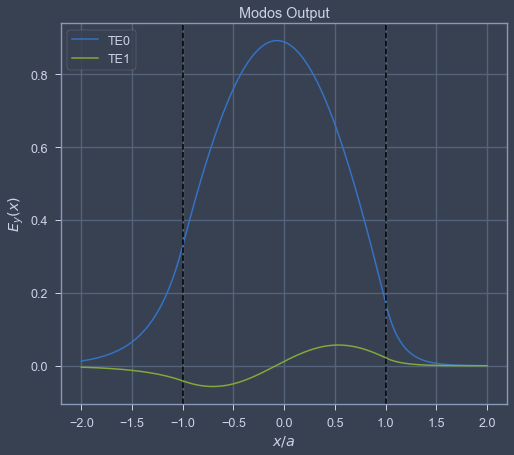

In [22]:
transmissaoTE = 0
ajEy = np.zeros(nm) #TE
print('MODO TE')
for m in range(nm):
    ajEy[m] = np.trapz(np.multiply(entrada,Ey[m]),x=x/a)
    print('A{0} = {1}'.format(m,round(ajEy[m],5)))

for m in range(nm):
    plt.plot(x/a,ajEy[m]*Ey[m],label = 'TE{0}'.format(m))
    transmissaoTE = transmissaoTE + np.trapz(np.multiply(ajEy[m]*Ey[m],ajEy[m]*Ey[m]),x=x/a)
print('Transmissão modo TE = {0}%'.format(round(transmissaoTE*100,2)))
plt.title('Modos Output')
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_y(x)}$');

## MODO TM

MODO TM
A0 = -0.98585
A1 = 0.08357
Transmissão modo TM = 97.89%


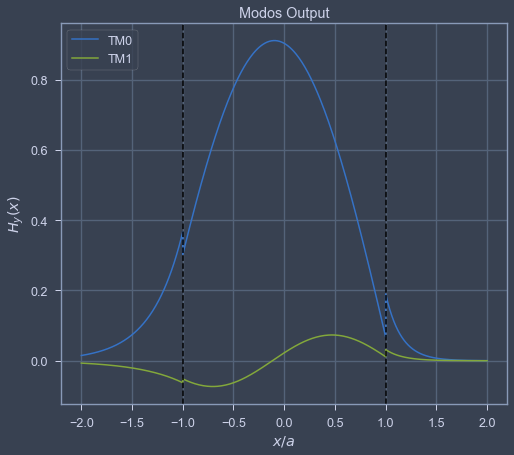

In [24]:
transmissaoTM = 0
ajHy = np.zeros(nm) #TM
print('MODO TM')
for m in range(nm):
    ajHy[m] = np.trapz(np.multiply(entrada,Hy[m]),x=x/a)
    print('A{0} = {1}'.format(m,round(ajHy[m],5)))

for m in range(nm):
    plt.plot(x/a,ajHy[m]*Hy[m],label = 'TM{0}'.format(m))
    transmissaoTM = transmissaoTM + np.trapz(np.multiply(ajHy[m]*Hy[m],ajHy[m]*Hy[m]),x=x/a)
print('Transmissão modo TM = {0}%'.format(round(transmissaoTM*100,2)))
plt.title('Modos Output')
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_y(x)}$');